### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [394]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 15:28:04


In [395]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [396]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [397]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [398]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [399]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [400]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 15:28:04


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [401]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [402]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [403]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [404]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [405]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [406]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [407]:
# for sg variable
sg = 0 # CBOW
# sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=0, model=CBOW


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [408]:
vector_sizes = [50, 100, 150, 200, 250, 300]
selected_vector_size = 200

In [409]:
# windows = [3, 5, 7, 10, 12, 15, 20]
windows = [8, 9, 10, 11, 12]
selected_window = 10

In [410]:
# epochs = [50, 100, 150, 200, 250]
epochs = [5, 10, 20, 30, 40, 50, 60]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [411]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [412]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [413]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [414]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [415]:
copy_of_docs = documents

In [416]:
window = selected_window
# epoch = selected_epoch
vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [417]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [418]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [419]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [420]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for epoch in epochs:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.1 range
            sil_diff = sil - best_Sil
            wss_diff = best_WSS - wss
            if sil_diff > 0 and sil_diff < 0.1 and wss_diff > 0:
                best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 15:28:06,540 : INFO : collecting all words and their counts
2025-03-09 15:28:06,542 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:06,544 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:06,552 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:06,555 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:06,558 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:06.558595', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:06,560 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:28:06 



2025-03-09 15:28:06,738 : INFO : EPOCH 4: training on 24723 raw words (4699 effective words) took 0.0s, 356193 effective words/s
2025-03-09 15:28:06,742 : INFO : Word2Vec lifecycle event {'msg': 'training on 123615 raw words (23578 effective words) took 0.2s, 150776 effective words/s', 'datetime': '2025-03-09T15:28:06.742594', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'train'}
2025-03-09 15:28:06,744 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=38, vector_size=200, alpha=0.025>', 'datetime': '2025-03-09T15:28:06.744592', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'created'}


sg=0, Vector_Size=200, Window=10, Epoch=5
Finished displaying at: 2025-03-09 15:28:06 

Executing 5 start time: 2025-03-09 15:28:06
K=5: Silhouette Score and WSS=0.3298	0.0290

Cluster 0:
- Pakistan, Turkiye sign multiple agreements to strengthen bilateral ties
- Basketball star Jahki Howard caught sliding into DMs of trans influencer
- PGF’s ‘train the trainers program’ boosts golf coaching in Pakistan
- Still Angry at Your Ex? The San Antonio Zoo Will Name a Cockroach After Them & Feed it To Animals
- Europe, Kyiv warn Trump against ‘dirty deal’ on Ukraine

Cluster 1:
- Feb 14 last date to submit third installment for Hajj 2025
- Champions Trophy 2025 Prize Money Breakdown in Pakistani rupee for 2025
- Pakistan’s 2nd polio case of 2025 reported in Badin
- Gold price soars by Rs2,500 per tola
- Over 16,000 School Teacher Jobs 2025 – Here’s all you need to know

Cluster 2:
- CSS 2025 exam to begin as scheduled after IHC dismisses postponement plea
- Pakistan CPI 2024 – deep-rooted corr

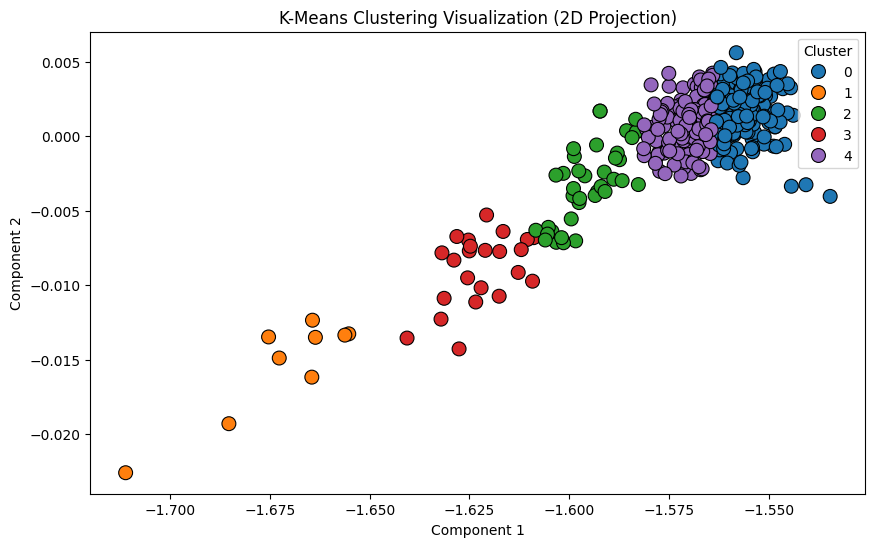

2025-03-09 15:28:07,424 : INFO : collecting all words and their counts
2025-03-09 15:28:07,425 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:07,426 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:07,435 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:07,438 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:07,441 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:07.440999', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:07,442 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:07 

Finished executing at: 2025-03-09 15:28:07 

Executed at: 2025-03-09 15:28:07 



2025-03-09 15:28:07,659 : INFO : EPOCH 7: training on 24723 raw words (4688 effective words) took 0.0s, 406253 effective words/s
2025-03-09 15:28:07,684 : INFO : EPOCH 8: training on 24723 raw words (4674 effective words) took 0.0s, 293610 effective words/s
2025-03-09 15:28:07,710 : INFO : EPOCH 9: training on 24723 raw words (4601 effective words) took 0.0s, 297753 effective words/s
2025-03-09 15:28:07,713 : INFO : Word2Vec lifecycle event {'msg': 'training on 247230 raw words (46727 effective words) took 0.2s, 188964 effective words/s', 'datetime': '2025-03-09T15:28:07.714000', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'train'}
2025-03-09 15:28:07,715 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=38, vector_size=200, alpha=0.025>', 'datetime': '2025-03-09T15:28:07.715993', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27

sg=0, Vector_Size=200, Window=10, Epoch=10
Finished displaying at: 2025-03-09 15:28:07 

Executing 5 start time: 2025-03-09 15:28:07
K=5: Silhouette Score and WSS=0.3179	0.0666

Cluster 0:
- Court reserves verdict on Elahi’s plea for permanent exemption
- First Lady of Turkiye visits Maarif International School in Islamabad
- Catherine Zeta-Jones to star in revenge thriller series Kill Jackie based on Nick Harkaway's novel
- Palestinian population 'must remain in its land’: Vatican
- PM thanks President Erdogan for visiting Pakistan

Cluster 1:
- Lahore set to host 9th Faiz Festival 2025 from today
- Israeli military killed 85 journalists in 2024: CPJ
- Journalist killings reach record high in 2024
- Champions Trophy 2025: squads, groups and schedule
- Gold price soars by Rs2,500 per tola

Cluster 2:
- MoITT sets up 43 software tech parks
- Pakistan set 243-run target for New Zealand in Tri-Nation series final
- AsiaPak, Montage Oil bid for 75% of Lotte Chemical
- Page World Economy an

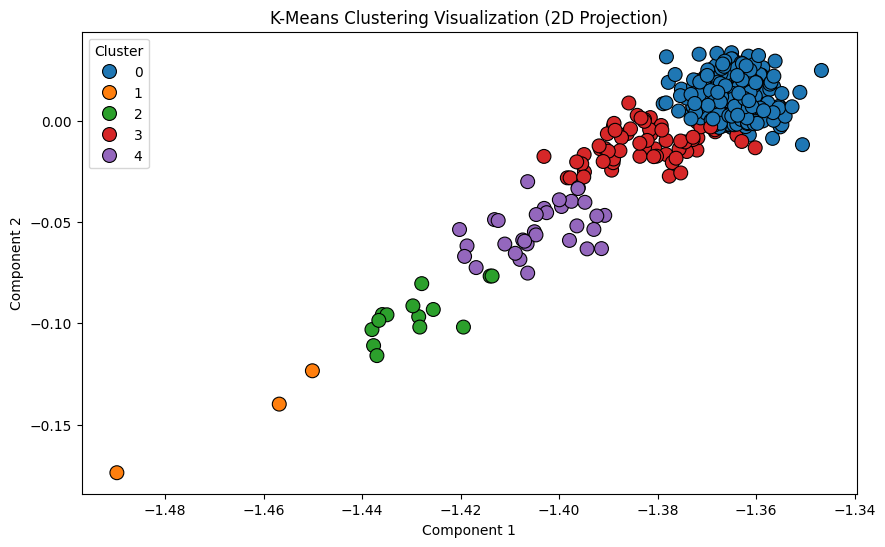

2025-03-09 15:28:08,184 : INFO : collecting all words and their counts
2025-03-09 15:28:08,185 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:08,187 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:08,192 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:08,194 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:08,195 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:08.195994', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:08,197 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:08 

Finished executing at: 2025-03-09 15:28:08 

Executed at: 2025-03-09 15:28:08 



2025-03-09 15:28:08,370 : INFO : EPOCH 8: training on 24723 raw words (4741 effective words) took 0.0s, 466629 effective words/s
2025-03-09 15:28:08,389 : INFO : EPOCH 9: training on 24723 raw words (4736 effective words) took 0.0s, 387726 effective words/s
2025-03-09 15:28:08,406 : INFO : EPOCH 10: training on 24723 raw words (4723 effective words) took 0.0s, 1031966 effective words/s
2025-03-09 15:28:08,421 : INFO : EPOCH 11: training on 24723 raw words (4748 effective words) took 0.0s, 506248 effective words/s
2025-03-09 15:28:08,438 : INFO : EPOCH 12: training on 24723 raw words (4688 effective words) took 0.0s, 594599 effective words/s
2025-03-09 15:28:08,457 : INFO : EPOCH 13: training on 24723 raw words (4806 effective words) took 0.0s, 488221 effective words/s
2025-03-09 15:28:08,478 : INFO : EPOCH 14: training on 24723 raw words (4702 effective words) took 0.0s, 463265 effective words/s
2025-03-09 15:28:08,495 : INFO : EPOCH 15: training on 24723 raw words (4840 effective word

sg=0, Vector_Size=200, Window=10, Epoch=20
Finished displaying at: 2025-03-09 15:28:08 

Executing 5 start time: 2025-03-09 15:28:08
K=5: Silhouette Score and WSS=0.4496	0.7170

Cluster 0:
- Couple remanded in Rawalpindi minor maid’s murder case
- Govt merges aviation ministry into defence, narcotics control into interior under rightsizing plan
- Thousands of patients treated at PIMS OPD in evening hours
- Sindh mandates physical fitness certificate for all heavy vehicles
- PTI’s call for remittance boycott fails as overseas Pakistanis prioritize family over politics

Cluster 1:
- Pakistan’s 2nd polio case of 2025 reported in Badin
- Israeli military killed 85 journalists in 2024: CPJ
- Feb 14 last date to submit third installment for Hajj 2025
- Champions Trophy 2025: squads, groups and schedule
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025

Cluster 2:
- The Digital Cold War: AI, Blockchain, Fintech, and the US-China Battle for Financial Dominance Pt 2
- Securi

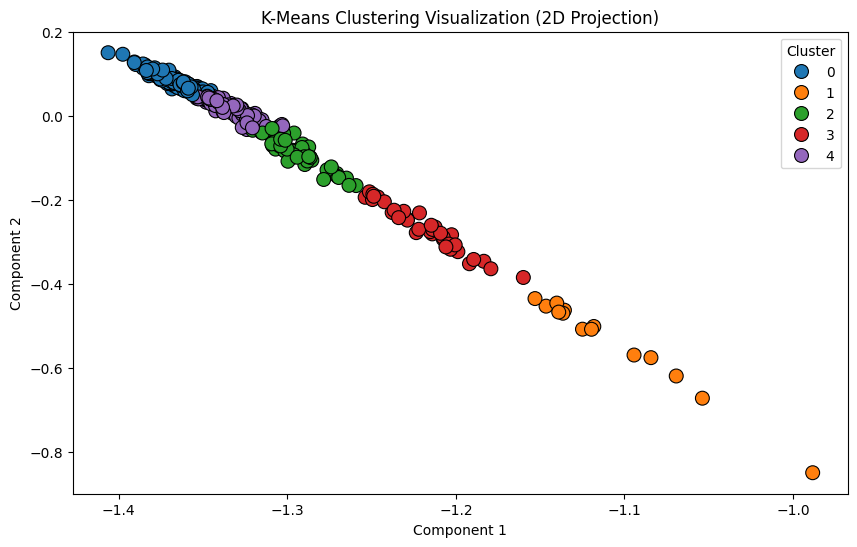

2025-03-09 15:28:08,994 : INFO : collecting all words and their counts
2025-03-09 15:28:08,995 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:08,997 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:09,002 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:09,005 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:09,005 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:09.005994', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:09,007 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:08 

Finished executing at: 2025-03-09 15:28:08 

Executed at: 2025-03-09 15:28:08 



2025-03-09 15:28:09,196 : INFO : EPOCH 9: training on 24723 raw words (4736 effective words) took 0.0s, 390978 effective words/s
2025-03-09 15:28:09,213 : INFO : EPOCH 10: training on 24723 raw words (4753 effective words) took 0.0s, 494147 effective words/s
2025-03-09 15:28:09,230 : INFO : EPOCH 11: training on 24723 raw words (4768 effective words) took 0.0s, 1252134 effective words/s
2025-03-09 15:28:09,247 : INFO : EPOCH 12: training on 24723 raw words (4630 effective words) took 0.0s, 805526 effective words/s
2025-03-09 15:28:09,262 : INFO : EPOCH 13: training on 24723 raw words (4646 effective words) took 0.0s, 519066 effective words/s
2025-03-09 15:28:09,281 : INFO : EPOCH 14: training on 24723 raw words (4617 effective words) took 0.0s, 364649 effective words/s
2025-03-09 15:28:09,297 : INFO : EPOCH 15: training on 24723 raw words (4698 effective words) took 0.0s, 504564 effective words/s
2025-03-09 15:28:09,313 : INFO : EPOCH 16: training on 24723 raw words (4745 effective wor

sg=0, Vector_Size=200, Window=10, Epoch=30
Finished displaying at: 2025-03-09 15:28:09 

Executing 5 start time: 2025-03-09 15:28:09
K=5: Silhouette Score and WSS=0.3220	1.3110

Cluster 0:
- Acting NASA chief says DOGE to review space agency spending as hundreds take buyout
- Fitness certificate made mandatory for all vehicles
- Babar Azam on verge of breaking multiple records against New Zealand
- Watch: Humpback whale swallows kayaker in dramatic Chilean waters encounter
- Wang's London visit marks revival of UK ties

Cluster 1:
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- India seen seeking global bids this year for 114 fighters
- ICC announces prize money for 2025 Champions Trophy
- PSX witnesses bearish trend, loses 360 points
- SBP reserves fall $500m in less than a month | Dawn News English

Cluster 2:
- Lahore set to host 9th Faiz Festival 2025 from today
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Second polio case of 20

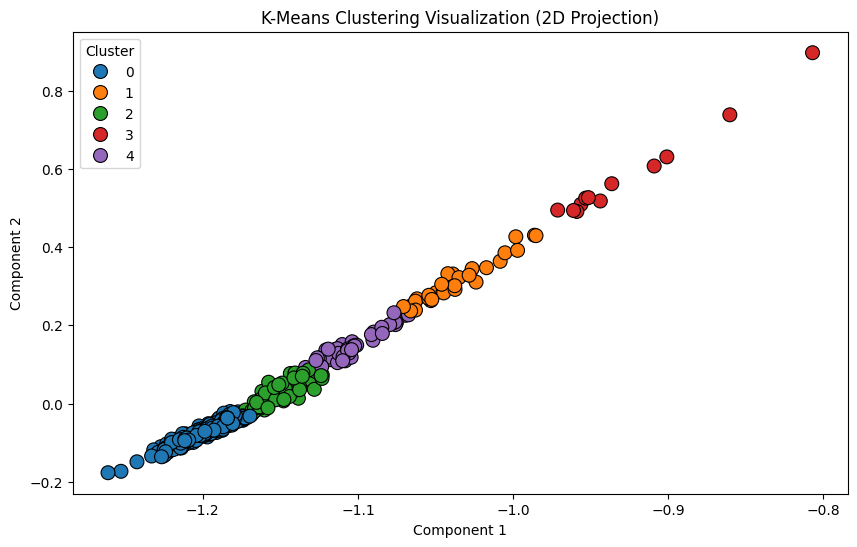

2025-03-09 15:28:09,930 : INFO : collecting all words and their counts
2025-03-09 15:28:09,930 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:09,931 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:09,936 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:09,938 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:09,939 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:09.939994', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:09,940 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:09 

Finished executing at: 2025-03-09 15:28:09 

Executed at: 2025-03-09 15:28:09 



2025-03-09 15:28:10,128 : INFO : EPOCH 8: training on 24723 raw words (4588 effective words) took 0.0s, 255407 effective words/s
2025-03-09 15:28:10,155 : INFO : EPOCH 9: training on 24723 raw words (4733 effective words) took 0.0s, 328925 effective words/s
2025-03-09 15:28:10,192 : INFO : EPOCH 10: training on 24723 raw words (4753 effective words) took 0.0s, 217650 effective words/s
2025-03-09 15:28:10,229 : INFO : EPOCH 11: training on 24723 raw words (4751 effective words) took 0.0s, 220175 effective words/s
2025-03-09 15:28:10,256 : INFO : EPOCH 12: training on 24723 raw words (4590 effective words) took 0.0s, 312962 effective words/s
2025-03-09 15:28:10,277 : INFO : EPOCH 13: training on 24723 raw words (4725 effective words) took 0.0s, 454406 effective words/s
2025-03-09 15:28:10,299 : INFO : EPOCH 14: training on 24723 raw words (4680 effective words) took 0.0s, 387542 effective words/s
2025-03-09 15:28:10,317 : INFO : EPOCH 15: training on 24723 raw words (4671 effective words

sg=0, Vector_Size=200, Window=10, Epoch=40
Finished displaying at: 2025-03-09 15:28:10 

Executing 5 start time: 2025-03-09 15:28:10
K=5: Silhouette Score and WSS=0.2862	2.6658

Cluster 0:
- Senate panel advances nomination of Kash Patel as FBI director pick
- Direct rule imposed on Manipur amid ethnic violence
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- Sabrina Carpenter and Dolly Parton’s 'Please Please Please' remix takes an unexpected turn in new video
- Polio certificate must for Saudi-bound passengers: PIA

Cluster 1:
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- Islamabad’s Zones 2, 4, and 5: CDA forms joint body to oversee projects
- Journalist killings reach record high in 2024
- PSX witnesses bearish trend, loses 360 points
- Excellence Over Perfection: Highlights from the ADA Awards 2025

Cluster 2:
- Russian drone attack damages Chernobyl shelter, Zelensky says
- PM Modi Meets Elon Musk in Washingt

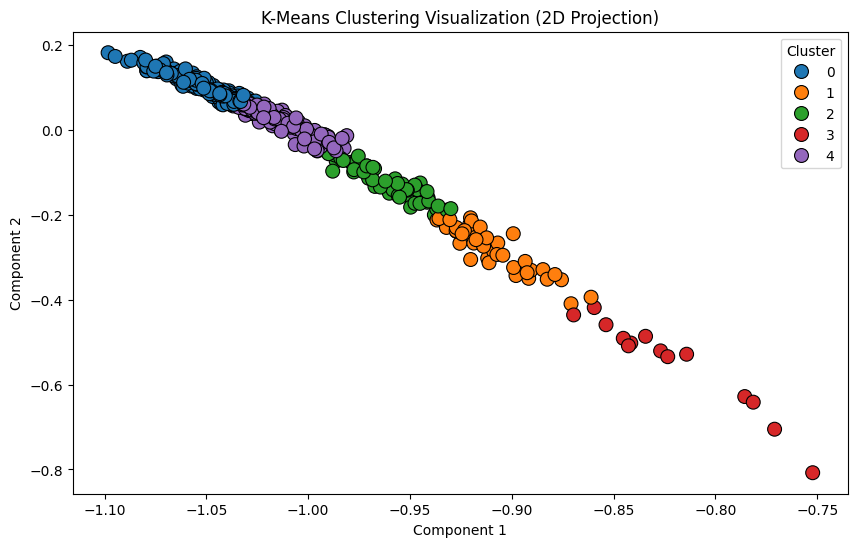

2025-03-09 15:28:11,217 : INFO : collecting all words and their counts
2025-03-09 15:28:11,219 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:11,221 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:11,227 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:11,230 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:11,231 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:11.231996', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:11,233 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:11 

Finished executing at: 2025-03-09 15:28:11 

Executed at: 2025-03-09 15:28:11 



2025-03-09 15:28:11,423 : INFO : EPOCH 6: training on 24723 raw words (4688 effective words) took 0.0s, 230871 effective words/s
2025-03-09 15:28:11,451 : INFO : EPOCH 7: training on 24723 raw words (4755 effective words) took 0.0s, 468695 effective words/s
2025-03-09 15:28:11,479 : INFO : EPOCH 8: training on 24723 raw words (4574 effective words) took 0.0s, 342909 effective words/s
2025-03-09 15:28:11,512 : INFO : EPOCH 9: training on 24723 raw words (4784 effective words) took 0.0s, 226761 effective words/s
2025-03-09 15:28:11,551 : INFO : EPOCH 10: training on 24723 raw words (4724 effective words) took 0.0s, 218491 effective words/s
2025-03-09 15:28:11,586 : INFO : EPOCH 11: training on 24723 raw words (4621 effective words) took 0.0s, 245815 effective words/s
2025-03-09 15:28:11,607 : INFO : EPOCH 12: training on 24723 raw words (4670 effective words) took 0.0s, 367335 effective words/s
2025-03-09 15:28:11,633 : INFO : EPOCH 13: training on 24723 raw words (4707 effective words) 

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:28:12 

Executing 5 start time: 2025-03-09 15:28:12
K=5: Silhouette Score and WSS=0.2123	5.9493

Cluster 0:
- Reforming pension funds in Pakistan: a sustainable approach
- Musk threatens to withdraw $97B OpenAI bid unless nonprofit shift stops
- In a first, new SC judges to take oath outdoors
- Hamas vows to uphold truce, plans to proceed with hostage-prisoner swap
- Pakistan prioritizes circular economy to boost sustainability, waste management: Romina

Cluster 1:
- Israeli military killed 85 journalists in 2024: CPJ
- UK Pound further climbs up against Pakistani rupee – 14 February 2025
- Journalist killings reach record high in 2024
- Govt hikes RLNG prices by up to 1.86pc
- Feb 14 last date to submit third installment for Hajj 2025

Cluster 2:
- Volunteers’ climate taskforce to be set up for meaningful environmental action
- New power projects: Govt removes FSA guarantee requirement
- Man gets four-yea

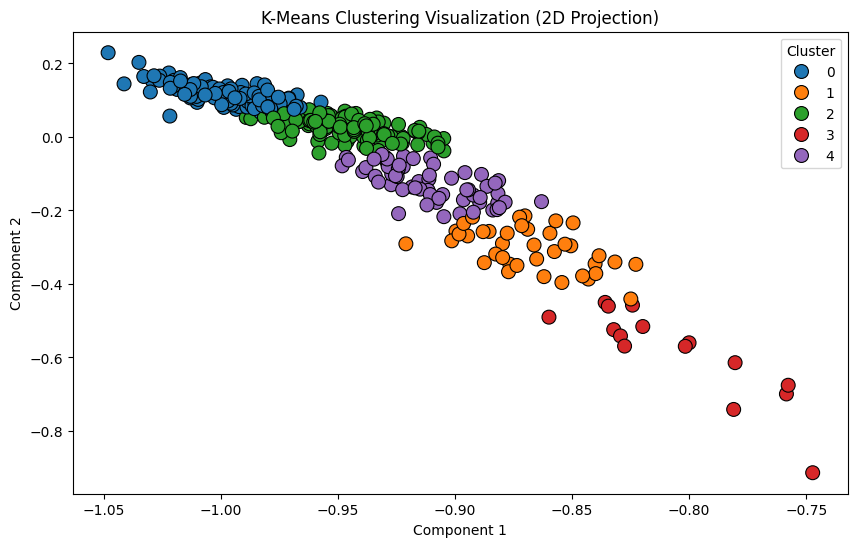

2025-03-09 15:28:13,255 : INFO : collecting all words and their counts
2025-03-09 15:28:13,257 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:13,258 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:13,264 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:13,267 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:13,270 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:13.270512', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:13,271 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:13 

Finished executing at: 2025-03-09 15:28:13 

Executed at: 2025-03-09 15:28:13 



2025-03-09 15:28:13,460 : INFO : EPOCH 7: training on 24723 raw words (4653 effective words) took 0.0s, 357228 effective words/s
2025-03-09 15:28:13,479 : INFO : EPOCH 8: training on 24723 raw words (4696 effective words) took 0.0s, 484543 effective words/s
2025-03-09 15:28:13,502 : INFO : EPOCH 9: training on 24723 raw words (4695 effective words) took 0.0s, 363753 effective words/s
2025-03-09 15:28:13,523 : INFO : EPOCH 10: training on 24723 raw words (4585 effective words) took 0.0s, 341560 effective words/s
2025-03-09 15:28:13,543 : INFO : EPOCH 11: training on 24723 raw words (4645 effective words) took 0.0s, 384488 effective words/s
2025-03-09 15:28:13,562 : INFO : EPOCH 12: training on 24723 raw words (4769 effective words) took 0.0s, 384309 effective words/s
2025-03-09 15:28:13,591 : INFO : EPOCH 13: training on 24723 raw words (4693 effective words) took 0.0s, 238564 effective words/s
2025-03-09 15:28:13,618 : INFO : EPOCH 14: training on 24723 raw words (4641 effective words)

sg=0, Vector_Size=200, Window=10, Epoch=60
Finished displaying at: 2025-03-09 15:28:15 

Executing 5 start time: 2025-03-09 15:28:15
K=5: Silhouette Score and WSS=0.1994	6.4575

Cluster 0:
- Former SC judge Sheikh Azmat Saeed’s funeral to be held today
- Field of education: Pakistan, Kazakhstan for enhancing mutual cooperation
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Babar Azam breaks Virat Kohli's another record
- I want to become a UFC World Champion, Bano Butt on her dreams and breaking barriers

Cluster 1:
- Pakistan set 243-run target for New Zealand in Tri-Nation series final
- Ralph Macchio reveals the key to his 38-year marriage and Cobra Kai legacy
- The Lord of the Rings: The Rings of Power season 3 officially renewed with filming starting in 2025
- Star Grammar School among 69 buildings sealed in Lahore
- Rapper Gillie Da Kid claims 17-Year-Old Noah Scurry killed his son before being shot dead

Cluster 2:
- Israeli military killed 85 journalists in

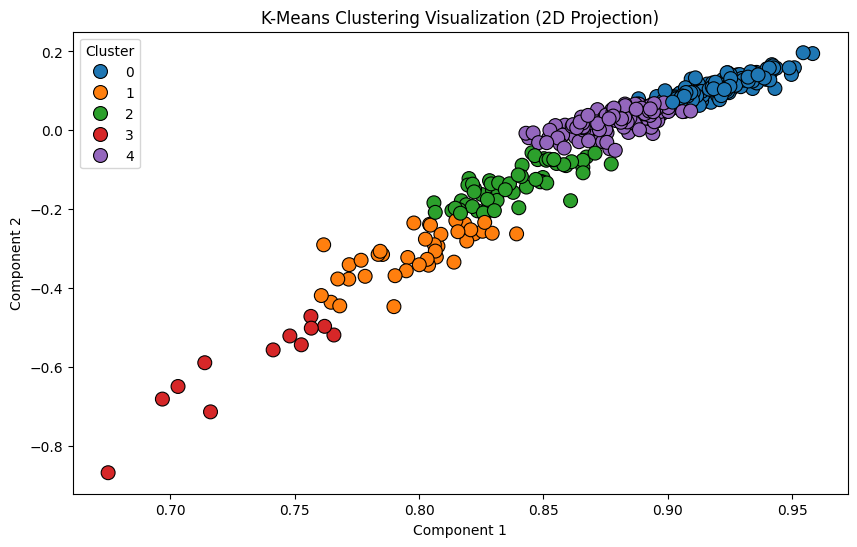

Finished displaying at: 2025-03-09 15:28:15 

Finished executing at: 2025-03-09 15:28:15 



In [421]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 15:28:15,591 : INFO : collecting all words and their counts
2025-03-09 15:28:15,593 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:15,595 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:15,602 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:15,605 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:15,607 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:15.607781', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:15,609 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:28:15 



2025-03-09 15:28:15,802 : INFO : EPOCH 2: training on 24723 raw words (4645 effective words) took 0.0s, 186031 effective words/s
2025-03-09 15:28:15,839 : INFO : EPOCH 3: training on 24723 raw words (4752 effective words) took 0.0s, 210387 effective words/s
2025-03-09 15:28:15,873 : INFO : EPOCH 4: training on 24723 raw words (4668 effective words) took 0.0s, 244344 effective words/s
2025-03-09 15:28:15,878 : INFO : Word2Vec lifecycle event {'msg': 'training on 123615 raw words (23529 effective words) took 0.2s, 98548 effective words/s', 'datetime': '2025-03-09T15:28:15.878783', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'train'}
2025-03-09 15:28:15,880 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=38, vector_size=200, alpha=0.025>', 'datetime': '2025-03-09T15:28:15.880780', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:

sg=0, Vector_Size=200, Window=10, Epoch=5
Finished displaying at: 2025-03-09 15:28:16 

Executing 9 start time: 2025-03-09 15:28:16
K=9: Silhouette Score and WSS=0.1611	0.0217

Cluster 0:
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says
- Europe, Kyiv warn Trump against ‘dirty deal’ on Ukraine
- PSG president Nasser Al-Khelaïfi indicted in Lagardère investigation
- US Attorney General Pam Bondi files lawsuit against New York's immigration law

Cluster 1:
- Feb 14 last date to submit third installment for Hajj 2025
- Champions Trophy 2025 Prize Money Breakdown in Pakistani rupee for 2025
- Pakistan’s 2nd polio case of 2025 reported in Badin
- Gold price soars by Rs2,500 per tola
- Over 16,000 School Teacher Jobs 2025 – Here’s all you need to know

Cluster 2:
- MrBeast’s Beast Games winner: Who took home the $10M prize?
- More than 500 million take ‘holy dip’ in 

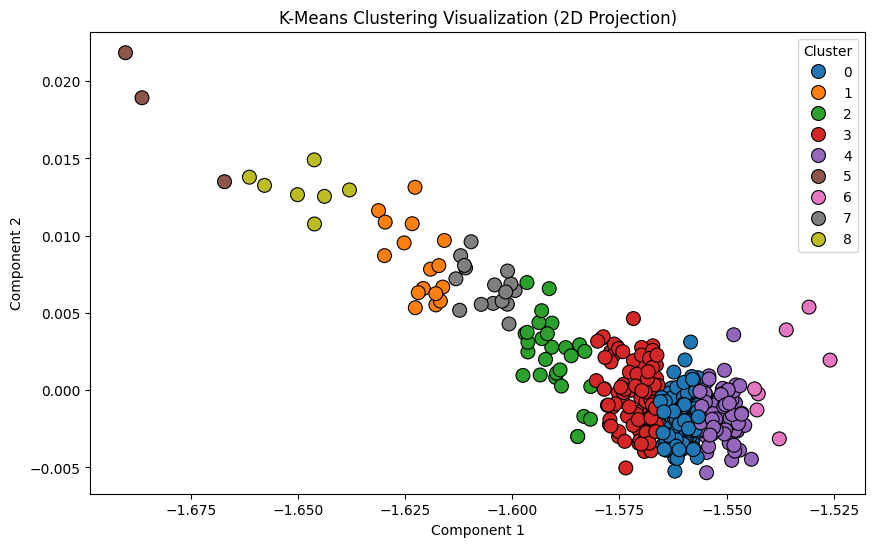

2025-03-09 15:28:16,823 : INFO : collecting all words and their counts
2025-03-09 15:28:16,826 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:16,828 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:16,835 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:16,837 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:16,842 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:16.842784', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:16,846 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:16 

Finished executing at: 2025-03-09 15:28:16 

Executed at: 2025-03-09 15:28:16 



2025-03-09 15:28:17,004 : INFO : EPOCH 3: training on 24723 raw words (4685 effective words) took 0.0s, 265116 effective words/s
2025-03-09 15:28:17,040 : INFO : EPOCH 4: training on 24723 raw words (4709 effective words) took 0.0s, 200807 effective words/s
2025-03-09 15:28:17,074 : INFO : EPOCH 5: training on 24723 raw words (4488 effective words) took 0.0s, 219998 effective words/s
2025-03-09 15:28:17,105 : INFO : EPOCH 6: training on 24723 raw words (4709 effective words) took 0.0s, 230013 effective words/s
2025-03-09 15:28:17,137 : INFO : EPOCH 7: training on 24723 raw words (4677 effective words) took 0.0s, 231307 effective words/s
2025-03-09 15:28:17,170 : INFO : EPOCH 8: training on 24723 raw words (4720 effective words) took 0.0s, 223748 effective words/s
2025-03-09 15:28:17,202 : INFO : EPOCH 9: training on 24723 raw words (4620 effective words) took 0.0s, 246751 effective words/s
2025-03-09 15:28:17,205 : INFO : Word2Vec lifecycle event {'msg': 'training on 247230 raw words (

sg=0, Vector_Size=200, Window=10, Epoch=10
Finished displaying at: 2025-03-09 15:28:17 

Executing 9 start time: 2025-03-09 15:28:17
K=9: Silhouette Score and WSS=0.1790	0.0430

Cluster 0:
- Gazans return to ruined homes and severe water shortage
- Pakistan expresses strong concerns over US transfer of advanced technology to India
- Supreme Court updates seniority list with new judges
- PSG president Nasser Al-Khelaïfi indicted in Lagardère investigation
- Watch: Chaotic scenes at Liverpool vs Everton as fans invade the pitch

Cluster 1:
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Excellence Over Perfection: Highlights from the ADA Awards 2025
- ICC announces prize money for 2025 Champions Trophy

Cluster 2:
- India seen seeking global bids this year for 114 fighters
- Pakistan, Turkey forge historic part

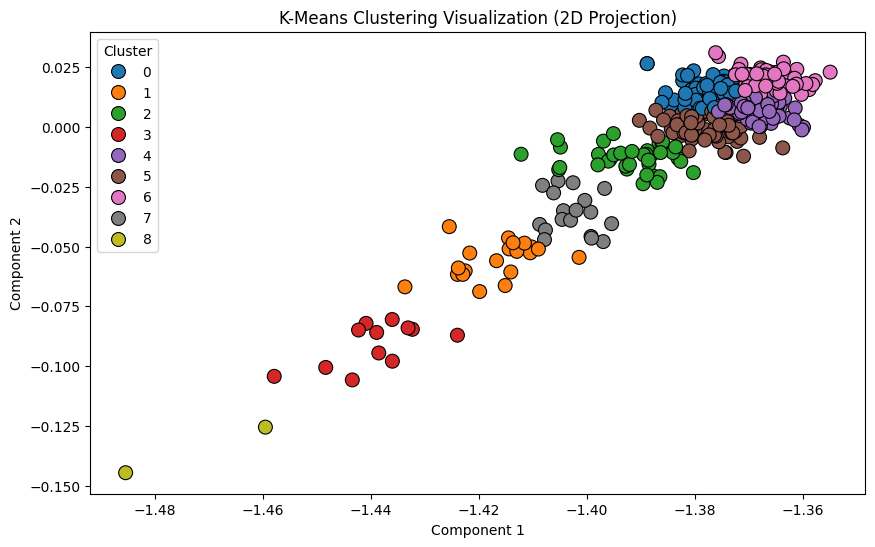

2025-03-09 15:28:18,156 : INFO : collecting all words and their counts
2025-03-09 15:28:18,160 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:18,162 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:18,172 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:18,173 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:18,176 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:18.175781', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:18,179 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:18 

Finished executing at: 2025-03-09 15:28:18 

Executed at: 2025-03-09 15:28:18 



2025-03-09 15:28:18,365 : INFO : EPOCH 4: training on 24723 raw words (4639 effective words) took 0.0s, 295478 effective words/s
2025-03-09 15:28:18,397 : INFO : EPOCH 5: training on 24723 raw words (4590 effective words) took 0.0s, 347957 effective words/s
2025-03-09 15:28:18,429 : INFO : EPOCH 6: training on 24723 raw words (4640 effective words) took 0.0s, 354878 effective words/s
2025-03-09 15:28:18,452 : INFO : EPOCH 7: training on 24723 raw words (4749 effective words) took 0.0s, 323259 effective words/s
2025-03-09 15:28:18,473 : INFO : EPOCH 8: training on 24723 raw words (4719 effective words) took 0.0s, 383609 effective words/s
2025-03-09 15:28:18,498 : INFO : EPOCH 9: training on 24723 raw words (4691 effective words) took 0.0s, 357099 effective words/s
2025-03-09 15:28:18,519 : INFO : EPOCH 10: training on 24723 raw words (4672 effective words) took 0.0s, 361915 effective words/s
2025-03-09 15:28:18,541 : INFO : EPOCH 11: training on 24723 raw words (4749 effective words) to

sg=0, Vector_Size=200, Window=10, Epoch=20
Finished displaying at: 2025-03-09 15:28:18 

Executing 9 start time: 2025-03-09 15:28:18
K=9: Silhouette Score and WSS=0.4278	0.3011

Cluster 0:
- Law minister defends IMF team meeting with CJP
- ‘Is this the same team?’: Cricket fans rejoice as Pakistan clinches record-breaking victory against South Africa
- PSG president Nasser Al-Khelaïfi indicted in Lagardère investigation
- PPL executes agreements for Sui Gas Field operations
- Reforming pension funds in Pakistan: a sustainable approach

Cluster 1:
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Stocks remain range-bound, KSE-100 closes 361 points lower
- SBP reserves fall $500m in less than a month | Dawn News English
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- Journalist killings reach record high in 2024

Cluster 2:
- Rs10bn defamation suit: LHC seeks more arguments on IK’s plea
- Page Analyses and Comments LHR Page 2
- Sean St

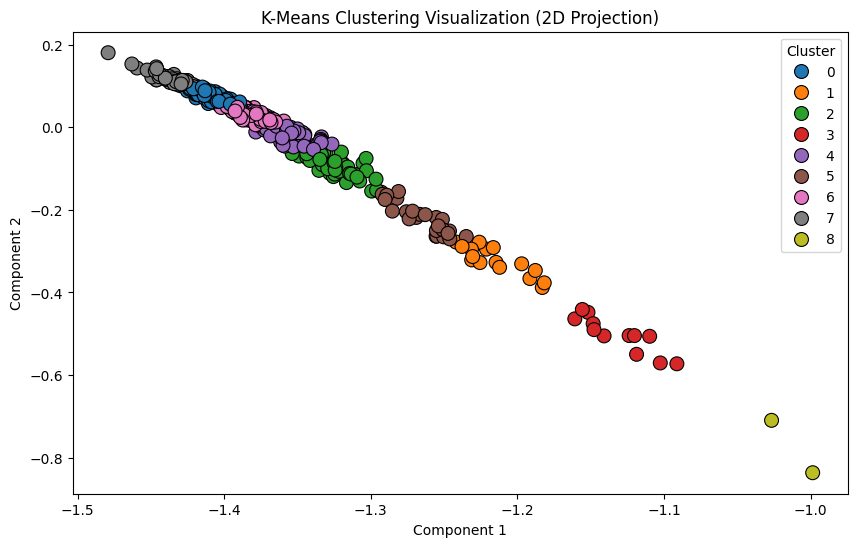

2025-03-09 15:28:19,255 : INFO : collecting all words and their counts
2025-03-09 15:28:19,256 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:19,257 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:19,262 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:19,265 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:19,267 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:19.267781', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:19,269 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:19 

Finished executing at: 2025-03-09 15:28:19 

Executed at: 2025-03-09 15:28:19 



2025-03-09 15:28:19,441 : INFO : EPOCH 8: training on 24723 raw words (4628 effective words) took 0.0s, 659645 effective words/s
2025-03-09 15:28:19,460 : INFO : EPOCH 9: training on 24723 raw words (4707 effective words) took 0.0s, 465100 effective words/s
2025-03-09 15:28:19,479 : INFO : EPOCH 10: training on 24723 raw words (4667 effective words) took 0.0s, 403224 effective words/s
2025-03-09 15:28:19,498 : INFO : EPOCH 11: training on 24723 raw words (4756 effective words) took 0.0s, 498548 effective words/s
2025-03-09 15:28:19,516 : INFO : EPOCH 12: training on 24723 raw words (4728 effective words) took 0.0s, 553390 effective words/s
2025-03-09 15:28:19,533 : INFO : EPOCH 13: training on 24723 raw words (4687 effective words) took 0.0s, 496788 effective words/s
2025-03-09 15:28:19,550 : INFO : EPOCH 14: training on 24723 raw words (4653 effective words) took 0.0s, 443747 effective words/s
2025-03-09 15:28:19,569 : INFO : EPOCH 15: training on 24723 raw words (4705 effective words

sg=0, Vector_Size=200, Window=10, Epoch=30
Finished displaying at: 2025-03-09 15:28:19 

Executing 9 start time: 2025-03-09 15:28:19
K=9: Silhouette Score and WSS=0.2327	1.1054

Cluster 0:
- Senate panel advances nomination of Kash Patel as FBI director pick
- CM Murad invites Japanese companies to invest in Karachi mass transit projects
- "Not my King': Anti-monarchy protesters chant at King Charles during visit to Middlesbrough
- Three Pakistani players fined for ICC code of conduct breach
- Bots dupe the lonely looking for love and access financial accounts

Cluster 1:
- IMF’s 2024 Article IV report, and debate on inflation—I
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- Champions Trophy 2025: squads, groups and schedule
- Stocks remain range-bound, KSE-100 closes 361 points lower
- ICC announces prize money for 2025 Champions Trophy

Cluster 2:
- I want to become a UFC World Champion, Bano Butt on her dreams and breaking barriers
- ‘Like a wormhole’: 

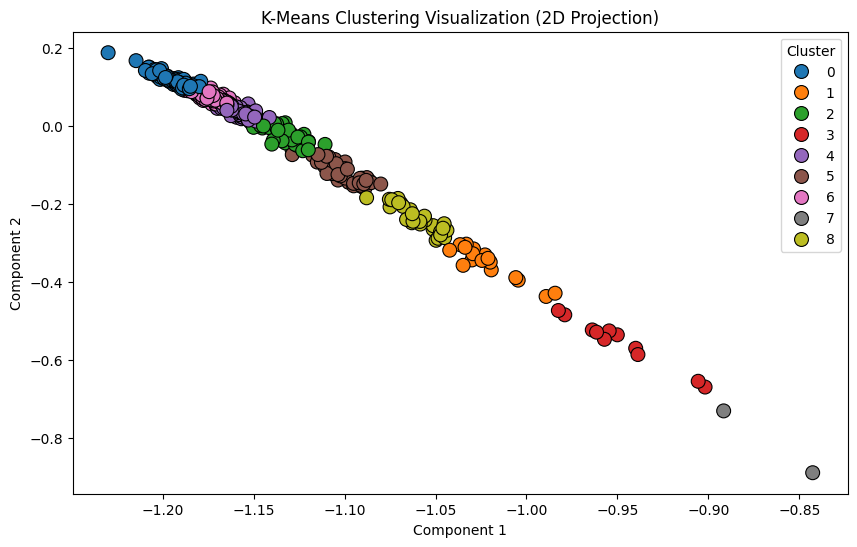

2025-03-09 15:28:20,321 : INFO : collecting all words and their counts
2025-03-09 15:28:20,322 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:20,323 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:20,328 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:20,330 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:20,331 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:20.331883', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:20,334 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:20 

Finished executing at: 2025-03-09 15:28:20 

Executed at: 2025-03-09 15:28:20 



2025-03-09 15:28:20,521 : INFO : EPOCH 10: training on 24723 raw words (4685 effective words) took 0.0s, 429753 effective words/s
2025-03-09 15:28:20,538 : INFO : EPOCH 11: training on 24723 raw words (4666 effective words) took 0.0s, 526274 effective words/s
2025-03-09 15:28:20,554 : INFO : EPOCH 12: training on 24723 raw words (4623 effective words) took 0.0s, 517827 effective words/s
2025-03-09 15:28:20,570 : INFO : EPOCH 13: training on 24723 raw words (4788 effective words) took 0.0s, 516784 effective words/s
2025-03-09 15:28:20,586 : INFO : EPOCH 14: training on 24723 raw words (4755 effective words) took 0.0s, 520970 effective words/s
2025-03-09 15:28:20,605 : INFO : EPOCH 15: training on 24723 raw words (4731 effective words) took 0.0s, 488361 effective words/s
2025-03-09 15:28:20,620 : INFO : EPOCH 16: training on 24723 raw words (4684 effective words) took 0.0s, 559157 effective words/s
2025-03-09 15:28:20,638 : INFO : EPOCH 17: training on 24723 raw words (4696 effective wor

sg=0, Vector_Size=200, Window=10, Epoch=40
Finished displaying at: 2025-03-09 15:28:21 

Executing 9 start time: 2025-03-09 15:28:21
K=9: Silhouette Score and WSS=0.1991	2.2651

Cluster 0:
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says
- Britain announces new sanctions against Putin allies
- US awaits Arab plan for Gaza, Trump plan remains default option: Washington
- Aurangzeb highlights increasing risks facing insurance industry
- Chahat Fateh Ali Khan, Meera’s 'Bado Badi' collab amuses netizens

Cluster 1:
- Pakistan’s 2nd polio case of 2025 reported in Badin
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Second polio case of 2025 reported from Badin
- Israeli military killed 85 journalists in 2024: CPJ
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025

Cluster 2:
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- Bank Alfalah strengthens Qist Bazaar with Rs55m equity and Rs460m cre

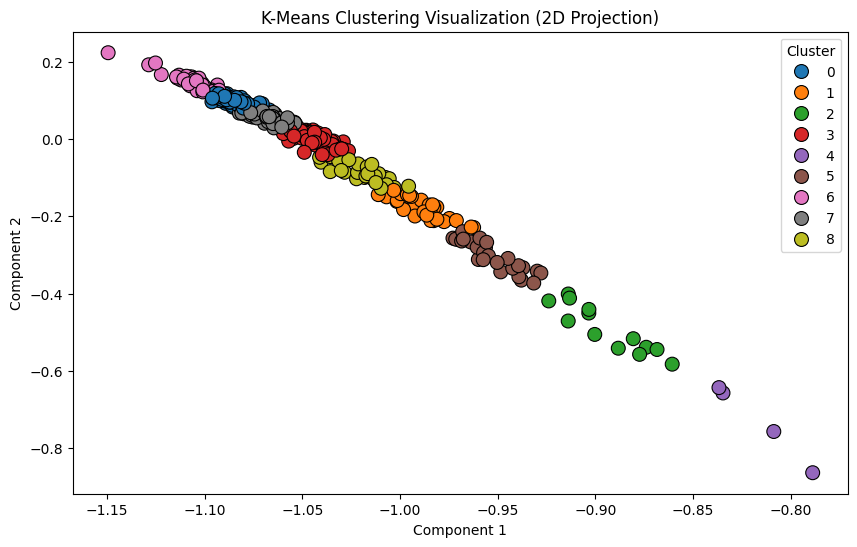

2025-03-09 15:28:21,747 : INFO : collecting all words and their counts
2025-03-09 15:28:21,749 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:21,751 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:21,755 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:21,756 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:21,759 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:21.759880', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:21,760 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:21 

Finished executing at: 2025-03-09 15:28:21 

Executed at: 2025-03-09 15:28:21 



2025-03-09 15:28:21,972 : INFO : EPOCH 8: training on 24723 raw words (4753 effective words) took 0.0s, 465643 effective words/s
2025-03-09 15:28:22,000 : INFO : EPOCH 9: training on 24723 raw words (4693 effective words) took 0.0s, 262645 effective words/s
2025-03-09 15:28:22,024 : INFO : EPOCH 10: training on 24723 raw words (4597 effective words) took 0.0s, 298856 effective words/s
2025-03-09 15:28:22,048 : INFO : EPOCH 11: training on 24723 raw words (4645 effective words) took 0.0s, 341180 effective words/s
2025-03-09 15:28:22,068 : INFO : EPOCH 12: training on 24723 raw words (4616 effective words) took 0.0s, 366407 effective words/s
2025-03-09 15:28:22,086 : INFO : EPOCH 13: training on 24723 raw words (4672 effective words) took 0.0s, 407437 effective words/s
2025-03-09 15:28:22,105 : INFO : EPOCH 14: training on 24723 raw words (4653 effective words) took 0.0s, 358577 effective words/s
2025-03-09 15:28:22,125 : INFO : EPOCH 15: training on 24723 raw words (4773 effective words

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:28:22 

Executing 9 start time: 2025-03-09 15:28:22
K=9: Silhouette Score and WSS=0.1893	3.7984

Cluster 0:
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- Shab-e-Barat being observed with religious fervour across country
- Soulja Boy drags Marlon Wayans’ dead mother in ongoing beef
- Everyone can’t go to jail to meet Imran: IHC CJ
- 'Cobra Kai' stars Tanner Buchanan and Mary Mouser confirm relationship, spark engagement rumours

Cluster 1:
- ICC announces prize money for 2025 Champions Trophy
- Togg T10X, Turkey's first national electric SUV
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- Champions Trophy 2025: squads, groups and schedule
- KSE-100 closes 479 points lower as late-session selling erases intra-day gains

Cluster 2:
- Authentic Voices in a Sea of Noise
- New power projects: Govt removes FSA guarantee requirement
- Thousand

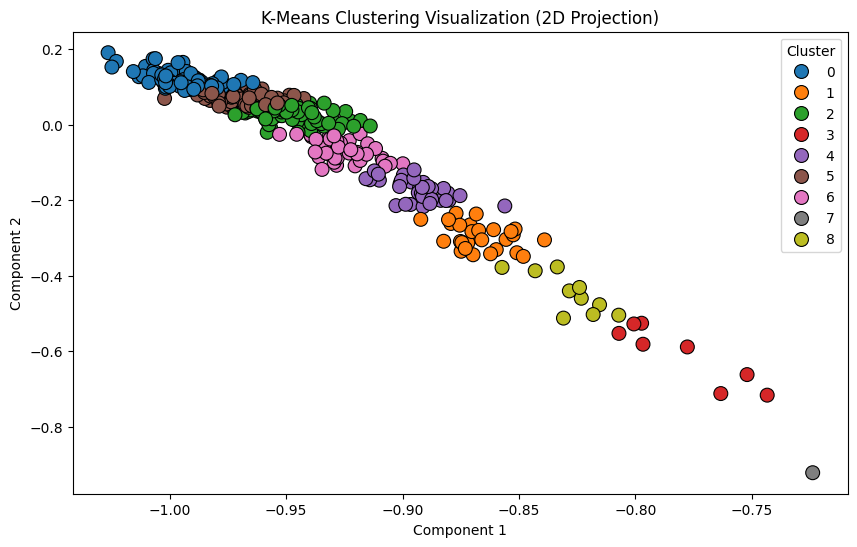

2025-03-09 15:28:23,186 : INFO : collecting all words and their counts
2025-03-09 15:28:23,188 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:23,189 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:23,195 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:23,196 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:23,198 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:23.198600', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:23,200 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:23 

Finished executing at: 2025-03-09 15:28:23 

Executed at: 2025-03-09 15:28:23 



2025-03-09 15:28:23,402 : INFO : EPOCH 10: training on 24723 raw words (4732 effective words) took 0.0s, 399865 effective words/s
2025-03-09 15:28:23,419 : INFO : EPOCH 11: training on 24723 raw words (4626 effective words) took 0.0s, 523641 effective words/s
2025-03-09 15:28:23,436 : INFO : EPOCH 12: training on 24723 raw words (4827 effective words) took 0.0s, 542207 effective words/s
2025-03-09 15:28:23,459 : INFO : EPOCH 13: training on 24723 raw words (4710 effective words) took 0.0s, 351259 effective words/s
2025-03-09 15:28:23,476 : INFO : EPOCH 14: training on 24723 raw words (4604 effective words) took 0.0s, 418473 effective words/s
2025-03-09 15:28:23,490 : INFO : EPOCH 15: training on 24723 raw words (4588 effective words) took 0.0s, 547181 effective words/s
2025-03-09 15:28:23,506 : INFO : EPOCH 16: training on 24723 raw words (4625 effective words) took 0.0s, 547674 effective words/s
2025-03-09 15:28:23,535 : INFO : EPOCH 17: training on 24723 raw words (4675 effective wor

sg=0, Vector_Size=200, Window=10, Epoch=60
Finished displaying at: 2025-03-09 15:28:24 

Executing 9 start time: 2025-03-09 15:28:24
K=9: Silhouette Score and WSS=0.1499	6.1243

Cluster 0:
- PARTLY FACETIOUS: Our stakeholders know everything about everything
- Macron warns against ‘peace that is a capitulation’ in Ukraine
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says
- Girl found dead, brother rescued after two years of captivity in Chakwal

Cluster 1:
- PSX witnesses bearish trend, loses 360 points
- Pakistan CPI 2024 – deep-rooted corruption persists
- IMF’s 2024 Article IV report, and debate on inflation—I
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- India expects $200 million missile deal with Philippines this year, sources say

Cluster 2:
- LHC takes stand against illegal dog culling
- Turkish President Erdogan reaches PM House for talks with Shehbaz S

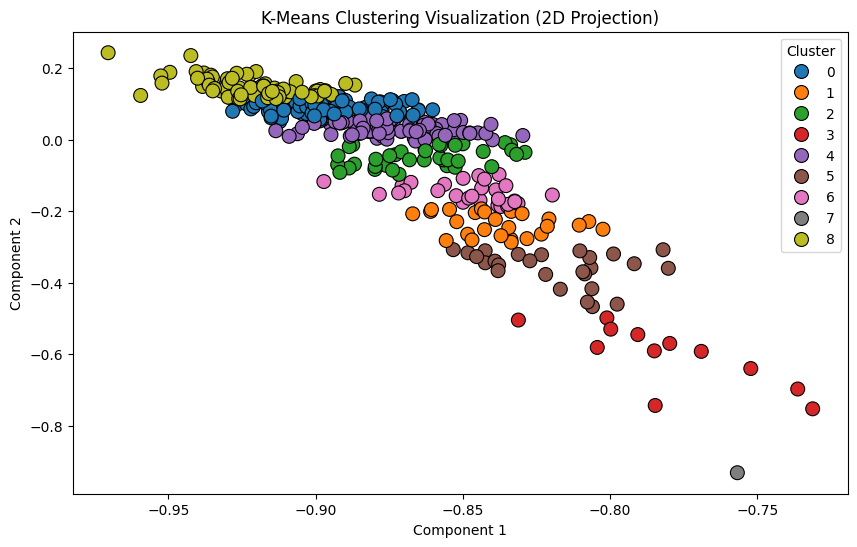

Finished displaying at: 2025-03-09 15:28:25 

Finished executing at: 2025-03-09 15:28:25 



In [422]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 15:28:25,058 : INFO : collecting all words and their counts
2025-03-09 15:28:25,060 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:25,063 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:25,069 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:25,072 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:25,074 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:25.074864', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:25,075 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:28:25 

sg=0, Vector_Size=200, Window=10, Epoch=5
Finished displaying at: 2025-03-09 15:28:25 

Executing 13 start time: 2025-03-09 15:28:25
K=13: Silhouette Score and WSS=0.1425	0.0146

Cluster 0:
- Credits against tax WH: FBR issuing notices to salaried individuals: KTBA
- PSG president Nasser Al-Khelaïfi indicted in Lagardère investigation
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance
- Sindh minister calls for bold steps to modernise agriculture
- Remembering Faiz: A Bengali kid’s first lessons in poetry & politics

Cluster 1:
- Feb 14 last date to submit third installment for Hajj 2025
- Champions Trophy 2025 Prize Money Breakdown in Pakistani rupee for 2025
- List of players to miss Champions Trophy 2025
- Pakistan’s 2nd polio case of 2025 reported in Badin
- UK Pound further climbs up against Pakistani rupee – 14 February 2025

Cluster 2:
- India seen seeking global bids this year for 114 fighters
- KSE-100 cl

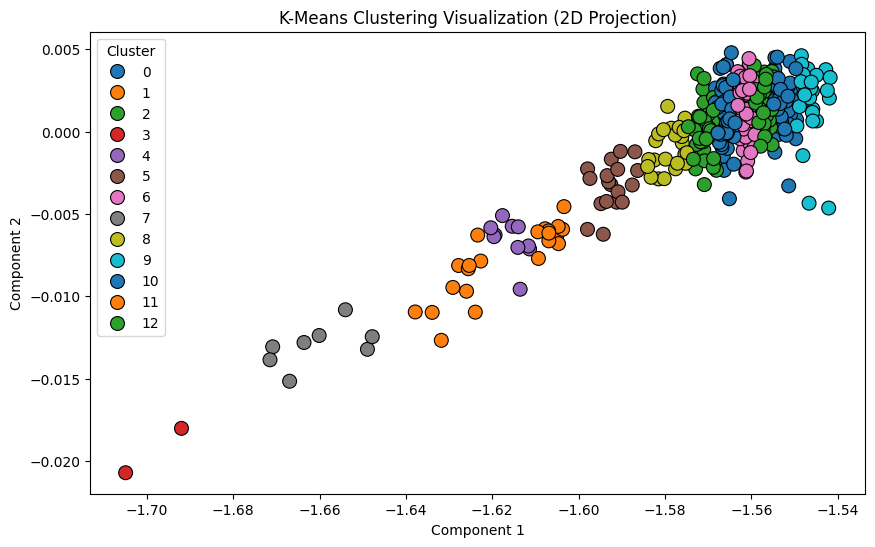

2025-03-09 15:28:25,905 : INFO : collecting all words and their counts
2025-03-09 15:28:25,908 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:25,910 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:25,921 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:25,922 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:25,925 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:25.924858', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:25,928 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:25 

Finished executing at: 2025-03-09 15:28:25 

Executed at: 2025-03-09 15:28:25 



2025-03-09 15:28:26,094 : INFO : EPOCH 4: training on 24723 raw words (4693 effective words) took 0.0s, 217869 effective words/s
2025-03-09 15:28:26,131 : INFO : EPOCH 5: training on 24723 raw words (4570 effective words) took 0.0s, 206441 effective words/s
2025-03-09 15:28:26,161 : INFO : EPOCH 6: training on 24723 raw words (4610 effective words) took 0.0s, 266271 effective words/s
2025-03-09 15:28:26,190 : INFO : EPOCH 7: training on 24723 raw words (4550 effective words) took 0.0s, 252740 effective words/s
2025-03-09 15:28:26,220 : INFO : EPOCH 8: training on 24723 raw words (4560 effective words) took 0.0s, 274624 effective words/s
2025-03-09 15:28:26,246 : INFO : EPOCH 9: training on 24723 raw words (4689 effective words) took 0.0s, 433316 effective words/s
2025-03-09 15:28:26,248 : INFO : Word2Vec lifecycle event {'msg': 'training on 247230 raw words (46355 effective words) took 0.3s, 154562 effective words/s', 'datetime': '2025-03-09T15:28:26.248869', 'gensim': '4.3.3', 'python

sg=0, Vector_Size=200, Window=10, Epoch=10
Finished displaying at: 2025-03-09 15:28:26 

Executing 13 start time: 2025-03-09 15:28:26
K=13: Silhouette Score and WSS=0.1464	0.0373

Cluster 0:
- Sale of spurious medicines uncovered across Sindh
- Three Pakistani players fined for ICC code of conduct breach
- Supreme Court updates seniority list with new judges
- Thousands of patients treated at PIMS OPD in evening hours
- Stocks extend overnight losses for want of triggers

Cluster 1:
- Pakistan CPI 2024 – deep-rooted corruption persists
- Umair Jaswal, Hadiqa Kiani, and Shae Gill to headline Lahooti 2025
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Excellence Over Perfection: Highlights from the ADA Awards 2025

Cluster 2:
- Page World Economy and Politics News Page 5
- MoITT sets up 43 software tech parks
- Page World Economy and Politics News ISB Page 5
- Ahmer honored for contributions to squ

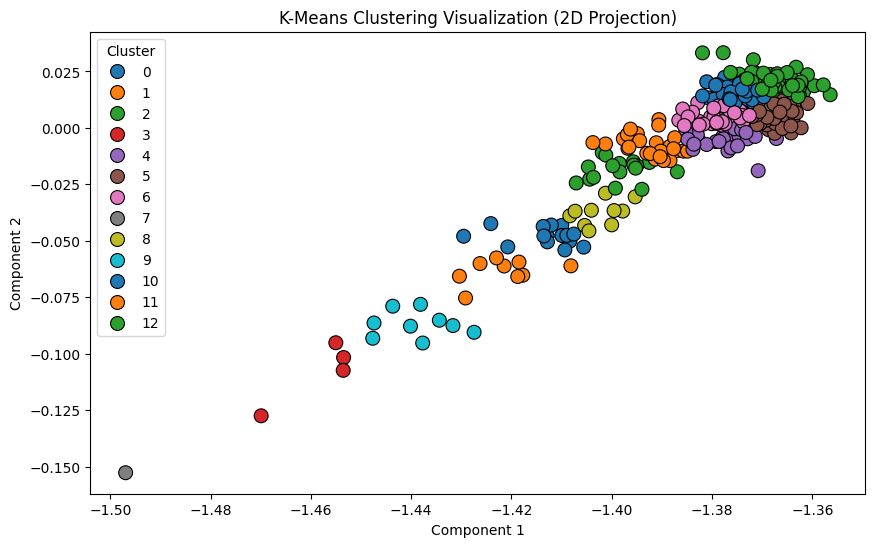

2025-03-09 15:28:26,839 : INFO : collecting all words and their counts
2025-03-09 15:28:26,841 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:26,843 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:26,848 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:26,851 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:26,853 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:26.852868', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:26,854 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:26 

Finished executing at: 2025-03-09 15:28:26 

Executed at: 2025-03-09 15:28:26 



2025-03-09 15:28:27,023 : INFO : EPOCH 8: training on 24723 raw words (4646 effective words) took 0.0s, 846605 effective words/s
2025-03-09 15:28:27,041 : INFO : EPOCH 9: training on 24723 raw words (4571 effective words) took 0.0s, 462497 effective words/s
2025-03-09 15:28:27,059 : INFO : EPOCH 10: training on 24723 raw words (4655 effective words) took 0.0s, 686578 effective words/s
2025-03-09 15:28:27,076 : INFO : EPOCH 11: training on 24723 raw words (4670 effective words) took 0.0s, 589885 effective words/s
2025-03-09 15:28:27,093 : INFO : EPOCH 12: training on 24723 raw words (4599 effective words) took 0.0s, 643982 effective words/s
2025-03-09 15:28:27,111 : INFO : EPOCH 13: training on 24723 raw words (4739 effective words) took 0.0s, 406875 effective words/s
2025-03-09 15:28:27,130 : INFO : EPOCH 14: training on 24723 raw words (4769 effective words) took 0.0s, 442430 effective words/s
2025-03-09 15:28:27,145 : INFO : EPOCH 15: training on 24723 raw words (4716 effective words

sg=0, Vector_Size=200, Window=10, Epoch=20
Finished displaying at: 2025-03-09 15:28:27 

Executing 13 start time: 2025-03-09 15:28:27
K=13: Silhouette Score and WSS=0.2937	0.1879

Cluster 0:
- CCP reviewing PTCL-Telenor merger ahead of spectrum auction
- India’s FX reserves rise to over one-month high on revaluation gains
- US aircraft carrier collides with merchant ship in Mediterranean
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice

Cluster 1:
- Stocks remain range-bound, KSE-100 closes 361 points lower
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Excellence Over Perfection: Highlights from the ADA Awards 2025
- ICC announces prize money for 2025 Champions Trophy

Cluster 2:
- Trump launches ‘reciprocal tariffs’ for allies, rivals
- US, India strike deal for F-35 stealth fig

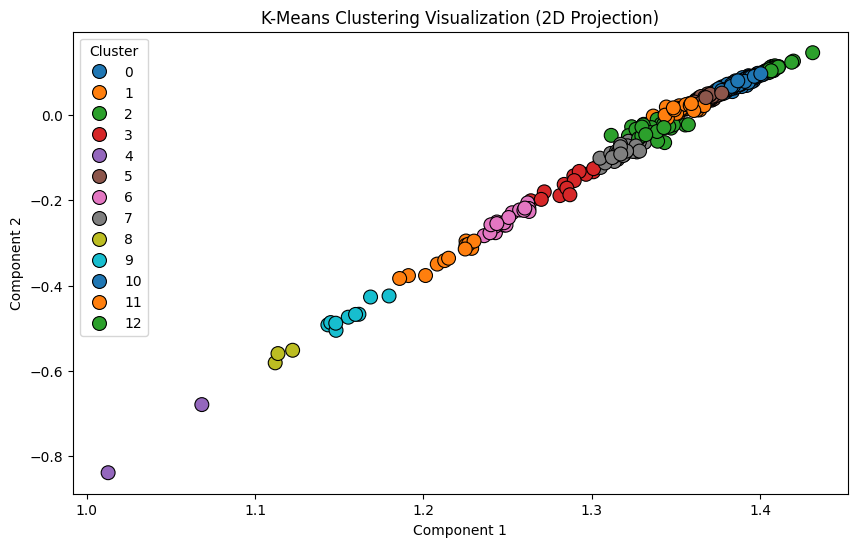

2025-03-09 15:28:27,729 : INFO : collecting all words and their counts
2025-03-09 15:28:27,731 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:27,732 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:27,737 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:27,739 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:27,740 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:27.740858', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:27,742 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:27 

Finished executing at: 2025-03-09 15:28:27 

Executed at: 2025-03-09 15:28:27 



2025-03-09 15:28:27,926 : INFO : EPOCH 9: training on 24723 raw words (4758 effective words) took 0.0s, 493758 effective words/s
2025-03-09 15:28:27,944 : INFO : EPOCH 10: training on 24723 raw words (4636 effective words) took 0.0s, 412386 effective words/s
2025-03-09 15:28:27,962 : INFO : EPOCH 11: training on 24723 raw words (4823 effective words) took 0.0s, 455223 effective words/s
2025-03-09 15:28:27,977 : INFO : EPOCH 12: training on 24723 raw words (4747 effective words) took 0.0s, 535042 effective words/s
2025-03-09 15:28:27,993 : INFO : EPOCH 13: training on 24723 raw words (4666 effective words) took 0.0s, 555113 effective words/s
2025-03-09 15:28:28,009 : INFO : EPOCH 14: training on 24723 raw words (4550 effective words) took 0.0s, 814653 effective words/s
2025-03-09 15:28:28,027 : INFO : EPOCH 15: training on 24723 raw words (4653 effective words) took 0.0s, 461314 effective words/s
2025-03-09 15:28:28,045 : INFO : EPOCH 16: training on 24723 raw words (4699 effective word

sg=0, Vector_Size=200, Window=10, Epoch=30
Finished displaying at: 2025-03-09 15:28:28 

Executing 13 start time: 2025-03-09 15:28:28
K=13: Silhouette Score and WSS=0.2140	0.6856

Cluster 0:
- Australia’s Johnson sees chance to shine while ‘Big Three’ quicks away
- JUI-F chief stands with journalists against PECA law
- House Democrats urge Trump to retract comments on Gaza
- Gold prices see another rise to reach record highs in Pakistan
- Acting NASA chief says DOGE to review space agency spending as hundreds take buyout

Cluster 1:
- No alcohol for fans at World Cup 2034, says Saudi Arabia ambassador
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- Over 500 million devotees take 'holy dip' at Maha Kumbh Mela in India
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- Saudi Arabia confirms alcohol ban at 2034 FIFA World Cup

Cluster 2:
- Three Pakistani players fined for ICC code of conduct breach
- Intra-party: elections case ECP d

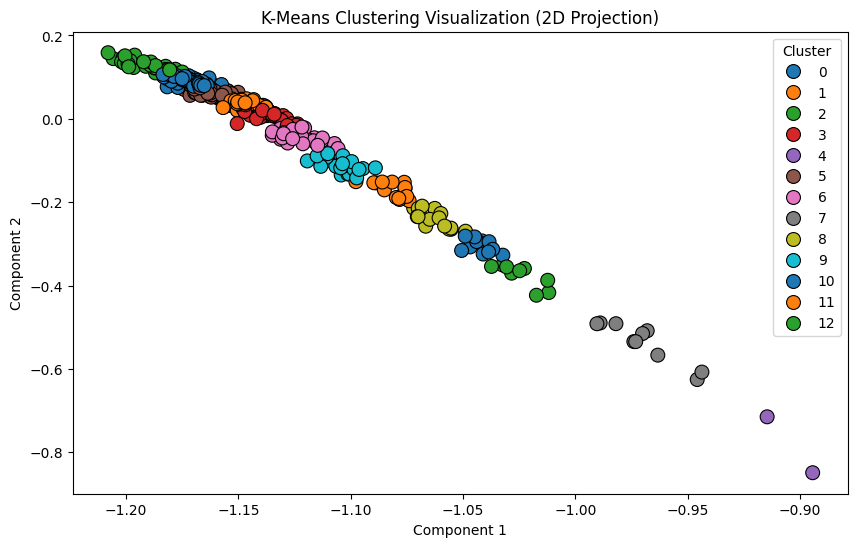

2025-03-09 15:28:28,852 : INFO : collecting all words and their counts
2025-03-09 15:28:28,854 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:28,855 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:28,861 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:28,865 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:28,869 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:28.869154', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:28,871 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:28 

Finished executing at: 2025-03-09 15:28:28 

Executed at: 2025-03-09 15:28:28 



2025-03-09 15:28:29,038 : INFO : EPOCH 7: training on 24723 raw words (4696 effective words) took 0.0s, 347978 effective words/s
2025-03-09 15:28:29,055 : INFO : EPOCH 8: training on 24723 raw words (4641 effective words) took 0.0s, 658513 effective words/s
2025-03-09 15:28:29,072 : INFO : EPOCH 9: training on 24723 raw words (4678 effective words) took 0.0s, 603925 effective words/s
2025-03-09 15:28:29,089 : INFO : EPOCH 10: training on 24723 raw words (4632 effective words) took 0.0s, 487020 effective words/s
2025-03-09 15:28:29,106 : INFO : EPOCH 11: training on 24723 raw words (4775 effective words) took 0.0s, 592667 effective words/s
2025-03-09 15:28:29,120 : INFO : EPOCH 12: training on 24723 raw words (4719 effective words) took 0.0s, 579644 effective words/s
2025-03-09 15:28:29,136 : INFO : EPOCH 13: training on 24723 raw words (4641 effective words) took 0.0s, 728023 effective words/s
2025-03-09 15:28:29,150 : INFO : EPOCH 14: training on 24723 raw words (4640 effective words)

sg=0, Vector_Size=200, Window=10, Epoch=40
Finished displaying at: 2025-03-09 15:28:29 

Executing 13 start time: 2025-03-09 15:28:29
K=13: Silhouette Score and WSS=0.1877	1.7945

Cluster 0:
- Aurangzeb highlights increasing risks facing insurance industry
- PTI’s call for remittance boycott fails as overseas Pakistanis prioritize family over politics
- Palestinian population 'must remain in its land’: Vatican
- Shaza engaging Huawei to advance Pak cloud infrastructure
- Reforming pension funds in Pakistan: a sustainable approach

Cluster 1:
- PSX witnesses bearish trend, loses 360 points
- Govt hikes RLNG prices by up to 1.86pc
- SBP injects over Rs 1.9 trillion in market
- The Lord of the Rings: The Rings of Power season 3 officially renewed with filming starting in 2025
- SBP reserves fall $500m in less than a month | Dawn News English

Cluster 2:
- Over 16,000 School Teacher Jobs 2025 – Here’s all you need to know
- Gold price soars by Rs2,500 per tola
- Feb 14 last date to submit 

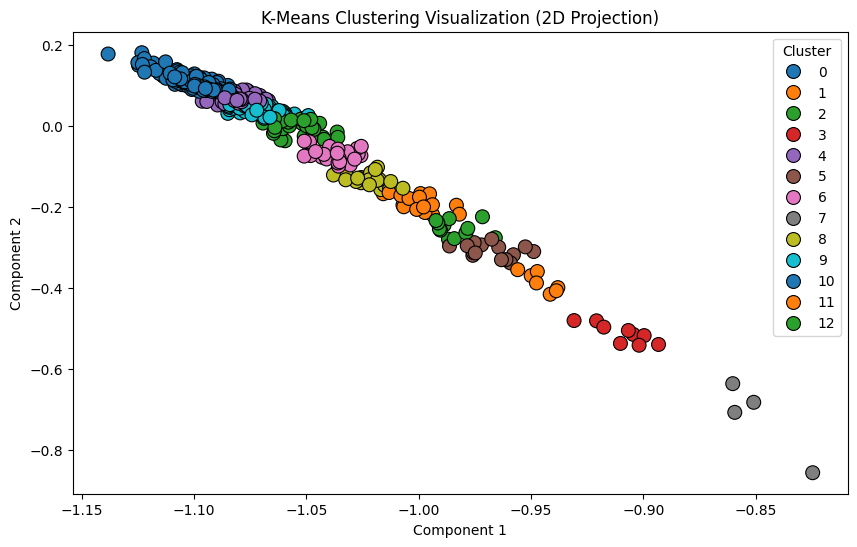

2025-03-09 15:28:30,119 : INFO : collecting all words and their counts
2025-03-09 15:28:30,120 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:30,121 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:30,124 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:30,127 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:30,128 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:30.128731', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:30,129 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:30 

Finished executing at: 2025-03-09 15:28:30 

Executed at: 2025-03-09 15:28:30 



2025-03-09 15:28:30,296 : INFO : EPOCH 9: training on 24723 raw words (4666 effective words) took 0.0s, 955952 effective words/s
2025-03-09 15:28:30,316 : INFO : EPOCH 10: training on 24723 raw words (4581 effective words) took 0.0s, 452346 effective words/s
2025-03-09 15:28:30,330 : INFO : EPOCH 11: training on 24723 raw words (4695 effective words) took 0.0s, 983555 effective words/s
2025-03-09 15:28:30,346 : INFO : EPOCH 12: training on 24723 raw words (4752 effective words) took 0.0s, 894612 effective words/s
2025-03-09 15:28:30,361 : INFO : EPOCH 13: training on 24723 raw words (4773 effective words) took 0.0s, 533266 effective words/s
2025-03-09 15:28:30,377 : INFO : EPOCH 14: training on 24723 raw words (4710 effective words) took 0.0s, 586098 effective words/s
2025-03-09 15:28:30,392 : INFO : EPOCH 15: training on 24723 raw words (4649 effective words) took 0.0s, 547953 effective words/s
2025-03-09 15:28:30,407 : INFO : EPOCH 16: training on 24723 raw words (4685 effective word

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:28:31 

Executing 13 start time: 2025-03-09 15:28:31
K=13: Silhouette Score and WSS=0.1708	3.3500

Cluster 0:
- Credits against tax WH: FBR issuing notices to salaried individuals: KTBA
- FO dismisses India-US statement against Pakistan as ‘one-sided, misleading’
- Hamas urges Arab summit, OIC meeting to reject Trump’s plan for Palestinian displacement
- Reforming pension funds in Pakistan: a sustainable approach
- Economist Stiglitz urges tariffs on Trump’s ‘dysfunctional’ admin

Cluster 1:
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- Druski roasted by NBA fans for bold 2025 All-Star game stat predictions and lack of defense
- Petrol Price in Pakistan to ‘go down’ from Feb 16 amid dip in global oil rates
- Deadly blast in Harnai kills 11 coal miners, injures four
- Sean Strickland responds to coach’s harsh criticism of UFC 312 loss

Cluster 2:
- Saudi Arabia confirms 

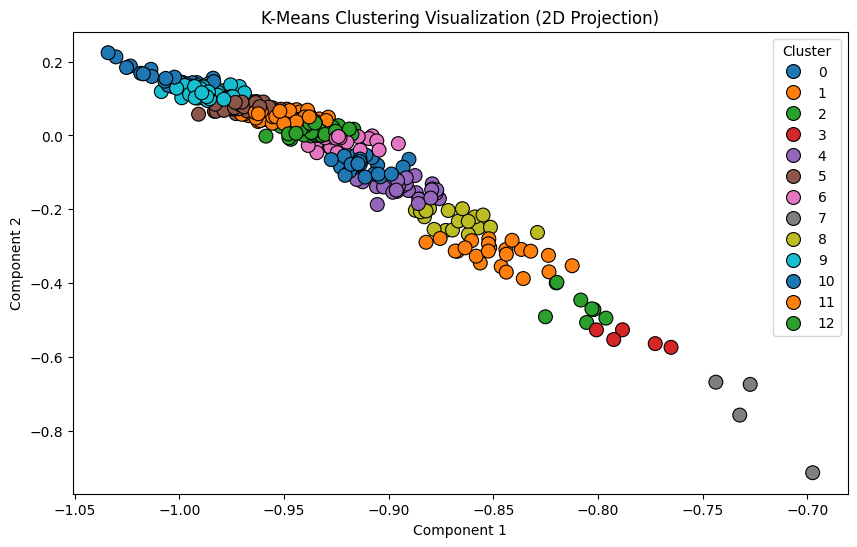

2025-03-09 15:28:31,550 : INFO : collecting all words and their counts
2025-03-09 15:28:31,551 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:28:31,552 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:28:31,558 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:28:31,561 : INFO : Creating a fresh vocabulary
2025-03-09 15:28:31,563 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:28:31.561981', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:28:31,563 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:28:31 

Finished executing at: 2025-03-09 15:28:31 

Executed at: 2025-03-09 15:28:31 



2025-03-09 15:28:31,762 : INFO : EPOCH 3: training on 24723 raw words (4652 effective words) took 0.0s, 165133 effective words/s
2025-03-09 15:28:31,790 : INFO : EPOCH 4: training on 24723 raw words (4718 effective words) took 0.0s, 317574 effective words/s
2025-03-09 15:28:31,818 : INFO : EPOCH 5: training on 24723 raw words (4734 effective words) took 0.0s, 239221 effective words/s
2025-03-09 15:28:31,851 : INFO : EPOCH 6: training on 24723 raw words (4614 effective words) took 0.0s, 325558 effective words/s
2025-03-09 15:28:31,867 : INFO : EPOCH 7: training on 24723 raw words (4665 effective words) took 0.0s, 565365 effective words/s
2025-03-09 15:28:31,885 : INFO : EPOCH 8: training on 24723 raw words (4703 effective words) took 0.0s, 461717 effective words/s
2025-03-09 15:28:31,900 : INFO : EPOCH 9: training on 24723 raw words (4704 effective words) took 0.0s, 500681 effective words/s
2025-03-09 15:28:31,922 : INFO : EPOCH 10: training on 24723 raw words (4637 effective words) too

sg=0, Vector_Size=200, Window=10, Epoch=60
Finished displaying at: 2025-03-09 15:28:32 

Executing 13 start time: 2025-03-09 15:28:32
K=13: Silhouette Score and WSS=0.1401	4.8279

Cluster 0:
- Reforming pension funds in Pakistan: a sustainable approach
- Fashion designer Mehmood Bhatti alleges assault by lawyers in Lahore court
- PGF’s ‘train the trainers program’ boosts golf coaching in Pakistan
- Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan
- Shab-e-Barat being observed with religious fervour across country

Cluster 1:
- Tri-series final: Pakistan set 243-run target for New Zealand
- State Bank of Pakistan’s liquid foreign reserves fall by $252 million
- MoITT sets up 43 software tech parks
- Key banks implicated in Rs117bn over-invoicing scandal linked to solar panel imports
- Bank Alfalah strengthens Qist Bazaar with Rs55m equity and Rs460m credit facility to fuel its expansion

Cluster 2:
- First Lady of Turkiye visits Maarif International Schoo

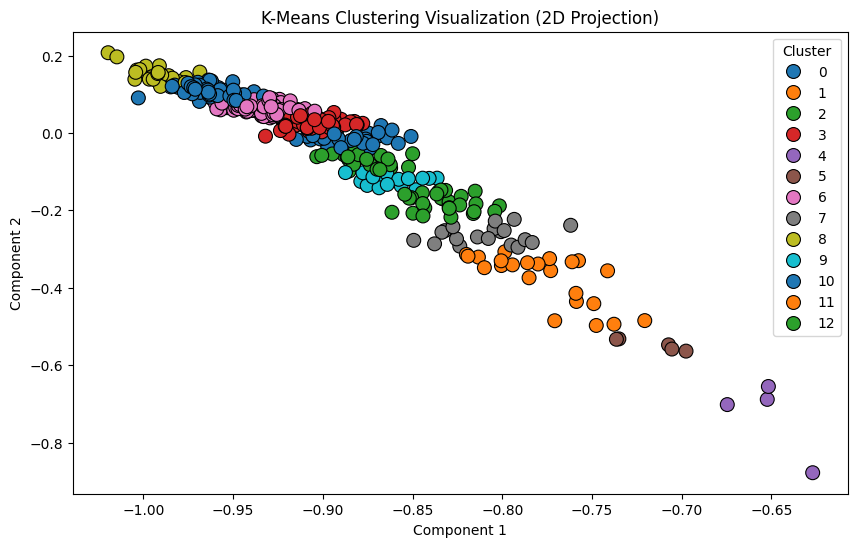

Finished displaying at: 2025-03-09 15:28:33 

Finished executing at: 2025-03-09 15:28:33 



In [423]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [424]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,200,10,5,CBOW,0.329780,0.029046
1,5,Word2Vec,200,10,10,CBOW,0.317877,0.066637
2,5,Word2Vec,200,10,20,CBOW,0.449610,0.717029
3,5,Word2Vec,200,10,30,CBOW,0.322020,1.311021
4,5,Word2Vec,200,10,40,CBOW,0.286241,2.665838
5,5,Word2Vec,200,10,50,CBOW,0.212325,5.949280
6,5,Word2Vec,200,10,60,CBOW,0.199382,6.457502
7,9,Word2Vec,200,10,5,CBOW,0.161103,0.021744
8,9,Word2Vec,200,10,10,CBOW,0.179006,0.043013
9,9,Word2Vec,200,10,20,CBOW,0.427813,0.301108


In [425]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,2.456622
1,9,1.951282
2,13,1.556832


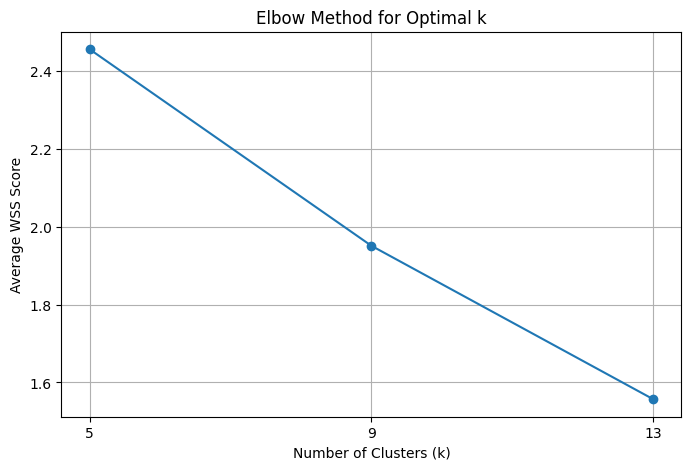

In [426]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [427]:
best_combination # vector size, window size, epoch

[5, 'word', 'CBOW', 200, 10, 5, 0.3297802, 0.029046453535556793]